## Analyzing movie rentals

In this short notebook, we'll connect to a PostgreSQL database with some sample data around a DVD rental business after which we'll visualize the data in Python.
We'll do this without ever leaving our notebook!

Below is the structure of the database (taken from [here](https://www.postgresqltutorial.com/postgresql-sample-database/)).

![](dvdrental.png)

As a first step, let's create a SQLAlchemy engine.
The database string is constructed with environment variables that were set a workspace integration.

In [4]:
from sqlalchemy import create_engine
import pandas as pd
import os

db_string = f'postgresql+psycopg2://{os.environ["DB_USERNAME"]}:{os.environ["DB_PASSWORD"]}@{os.environ["DB_HOST"]}/{os.environ["DB_NAME"]}'
engine = create_engine(db_string)

Let's say we want to see how often each film category was rented out.
We'll use pandas to execute a SQL query with a couple of joins:

In [5]:

with engine.connect() as con:
    df = pd.read_sql_query("""
    SELECT title as film_title, name as category_name, rental_date
    FROM rental
    INNER JOIN inventory USING(inventory_id)
    INNER JOIN film USING(film_id)
    INNER JOIN film_category USING(film_id)
    INNER JOIN category USING(category_id)
    """, con)

df.head()

,film_title,category_name,rental_date
0,Freaky Pocus,Music,2005-05-24 22:54:33
1,Graduate Lord,Children,2005-05-24 23:03:39
2,Love Suicides,Horror,2005-05-24 23:04:41
3,Idols Snatchers,Children,2005-05-24 23:05:21
4,Mystic Truman,Comedy,2005-05-24 23:08:07


Now we can calculate how often every category occured, after which we generate a bar plot in plotly.

In [6]:
aggregates = df.groupby(by = ['category_name']).size().reset_index(name='count').sort_values(by = ['count'])
aggregates.head()

,category_name,count
11,Music,830
15,Travel,837
10,Horror,846
3,Classics,939
12,New,940


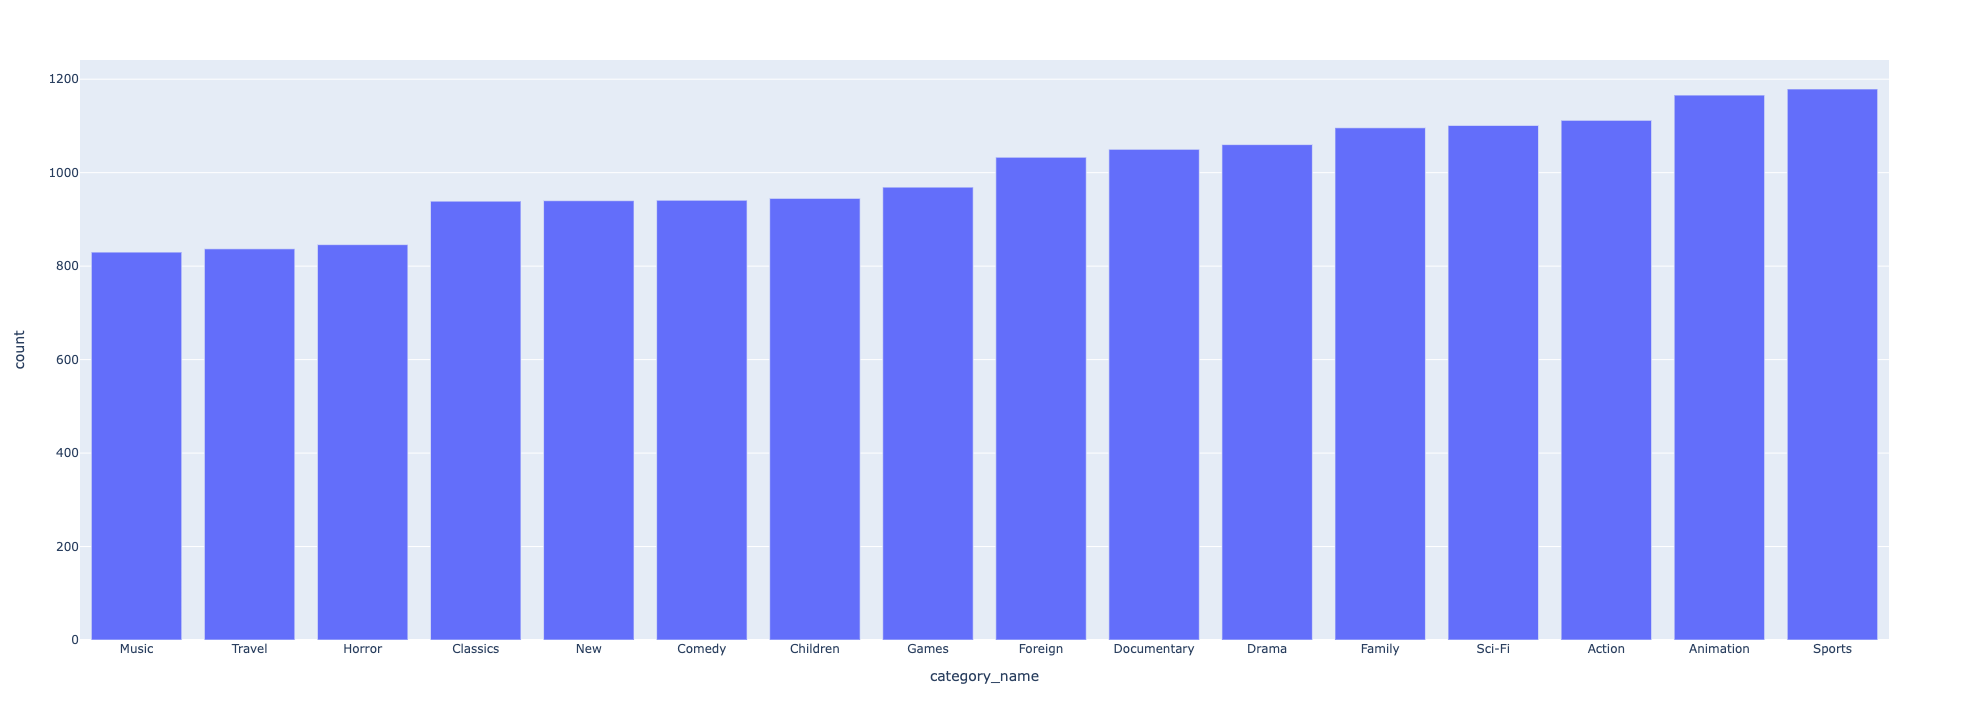

In [11]:
import plotly.express as px
px.bar(aggregates, x="category_name", y="count")